Introduction to AI Development - Assignment 2

Done By Chandrakanth Yarlagadda [Student ID - 100944159]

In [2]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#load the dataset
df = pd.read_csv('nba.csv')
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


**Understanding the outline of the dataset**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB


In [5]:
df.head(5)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [6]:
df.tail(5)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


**Initial analysis:** 
- The Data shows the salaries of various basketball players belonging to various teams.
- Along with the salary of the players, it also depicts the age, height and weight of the players.
- The data also includes the team name, player number and their respective position in the team and from which college the player is from.

**Data Cleaning**

In [7]:
#From the data-set it is evident that the columns = 'Name','Number' is not going to be of much significant use, hence dropping the columns
df = df.drop(columns=['Name','Number'])
df.head()

,Team,Position,Age,Height,Weight,College,Salary
0,Boston Celtics,PG,25.0,6-2,180.0,Texas,7730337.0
1,Boston Celtics,SF,25.0,6-6,235.0,Marquette,6796117.0
2,Boston Celtics,SG,27.0,6-5,205.0,Boston University,NaN
3,Boston Celtics,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Boston Celtics,PF,29.0,6-10,231.0,NaN,5000000.0


In [8]:
#Finding the Duplicate values
df.loc[df.duplicated()]
# This indicates that there are no duplicates in the overall set

,Team,Position,Age,Height,Weight,College,Salary


In [9]:
#Finding the Duplicate values in the subset where the analysis is going to be performed
df.loc[df.duplicated(subset=['Team','Position','Age','Height','Weight','Salary'])]

,Team,Position,Age,Height,Weight,College,Salary


In [10]:
#Dropping the Redundant data if any. But in our dataset, there are no duplicates as shown
df = df.drop_duplicates()
df.shape 

(457, 7)

In [11]:
#Finding the number of null values present
df.isna().sum()

Team         0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [12]:
#Replacing the missing values-> Mean for numerical data
df.Salary = df.Salary.fillna(df.Salary.mean())
df.isna().sum()

Team         0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary       0
dtype: int64

In [13]:
#Understanding the college column
number_of_unique_colleges = df['College'].nunique()
number_of_unique_colleges

118

In [14]:
#Since there are more than 100 unique Colleges and 84 missing fields, this column does not have much impact on the data set and it can be dropped
df = df.drop(columns=['College'])
df.head()


,Team,Position,Age,Height,Weight,Salary
0,Boston Celtics,PG,25.0,6-2,180.0,7.730337e+06
1,Boston Celtics,SF,25.0,6-6,235.0,6.796117e+06
2,Boston Celtics,SG,27.0,6-5,205.0,4.842684e+06
3,Boston Celtics,SG,22.0,6-5,185.0,1.148640e+06
4,Boston Celtics,PF,29.0,6-10,231.0,5.000000e+06


In [15]:
#check for further missing values
df.isna().sum()

Team        0
Position    0
Age         0
Height      0
Weight      0
Salary      0
dtype: int64

In [16]:
#Since Height is in feet and it is not easy for calculation, converting it into centimeters
def convert_height_to_cm(height):
    feet, inches = map(int, height.split('-'))
    height_cm = (feet * 12 + inches)*2.54
    return height_cm
df['Height'] = df['Height'].apply(convert_height_to_cm)
df.head()

,Team,Position,Age,Height,Weight,Salary
0,Boston Celtics,PG,25.0,187.96,180.0,7.730337e+06
1,Boston Celtics,SF,25.0,198.12,235.0,6.796117e+06
2,Boston Celtics,SG,27.0,195.58,205.0,4.842684e+06
3,Boston Celtics,SG,22.0,195.58,185.0,1.148640e+06
4,Boston Celtics,PF,29.0,208.28,231.0,5.000000e+06


In [17]:
#Converting Salary to int
df['Salary'] = df['Salary'].astype(int)
df.head()


,Team,Position,Age,Height,Weight,Salary
0,Boston Celtics,PG,25.0,187.96,180.0,7730337
1,Boston Celtics,SF,25.0,198.12,235.0,6796117
2,Boston Celtics,SG,27.0,195.58,205.0,4842684
3,Boston Celtics,SG,22.0,195.58,185.0,1148640
4,Boston Celtics,PF,29.0,208.28,231.0,5000000


**Explore the Data's Basic Statistics**

In [18]:
df.describe()

,Age,Height,Weight,Salary
count,457.000000,457.000000,457.000000,4.570000e+02
mean,26.938731,201.143545,221.522976,4.842684e+06
std,4.404016,8.718404,26.368343,5.165781e+06
min,19.000000,175.260000,161.000000,3.088800e+04
25%,24.000000,195.580000,200.000000,1.100602e+06
50%,26.000000,203.200000,220.000000,2.869440e+06
75%,30.000000,208.280000,240.000000,6.331404e+06
max,40.000000,220.980000,307.000000,2.500000e+07


In [19]:
#Detecting the outlier fields
df_numerical_data = df.drop(columns = ['Team','Position'])

q1=df_numerical_data.quantile(0.25)
q2=df_numerical_data.quantile(0.50)
q3=df_numerical_data.quantile(0.75)
iqr = q3-q1
upper_limit=(q3+1.5*iqr)
lower_limit=(q1-1.5*iqr)

limits_df = pd.DataFrame({
    'Q1': q1,
    'Q2': q2,
    'Q3': q3,
    'IQR': iqr,
    'Upper Limit': upper_limit,
    'Lower Limit': lower_limit
})
limits_df

,Q1,Q2,Q3,IQR,Upper Limit,Lower Limit
Age,24.00,26.0,30.00,6.0,39.00,15.00
Height,195.58,203.2,208.28,12.7,227.33,176.53
Weight,200.00,220.0,240.00,40.0,300.00,140.00
Salary,1100602.00,2869440.0,6331404.00,5230802.0,14177607.00,-6745601.00


In [20]:
#Noticing the number of outlier fields
df_numerical_data = df_numerical_data[(df_numerical_data > lower_limit) & (df_numerical_data < upper_limit)]
df_numerical_data.isna().sum()# Below are the count of outliers in each column

Age        5
Height     1
Weight     1
Salary    37
dtype: int64

<Axes: ylabel='Salary'>

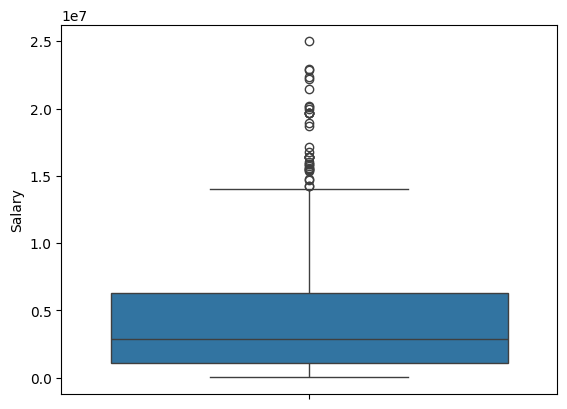

In [21]:
#Plotting the outlier fields - Salary
sns.boxplot(df['Salary'])

<Axes: >

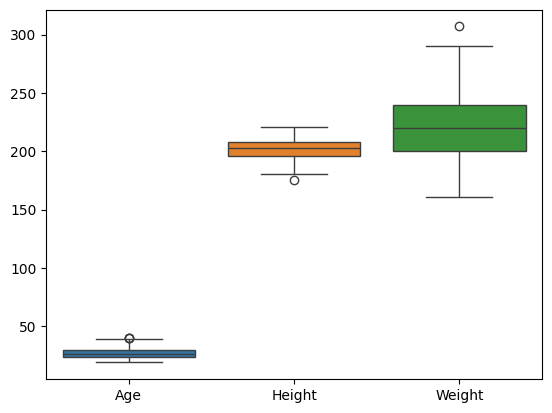

In [22]:
#Plotting the outlier fields
columns_to_plot = ['Age','Height','Weight']
sns.boxplot(data=df[columns_to_plot])

In [23]:
#The data after the data cleaning is done
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Team      457 non-null    object 
 1   Position  457 non-null    object 
 2   Age       457 non-null    float64
 3   Height    457 non-null    float64
 4   Weight    457 non-null    float64
 5   Salary    457 non-null    int32  
dtypes: float64(3), int32(1), object(2)
memory usage: 19.8+ KB


In [24]:
df.nunique()

Team         30
Position      5
Age          22
Height       18
Weight       87
Salary      310
dtype: int64

**Univariate Analysis - Feature Understanding**

<Axes: xlabel='count', ylabel='Team'>

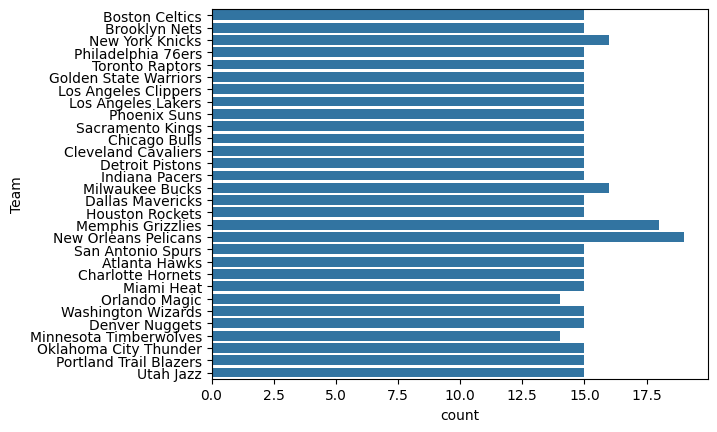

In [25]:
#Analysing the categorical columns - Team
sns.countplot(df['Team'])

In [26]:
df['Team'].value_counts()

Team
New Orleans Pelicans      19
Memphis Grizzlies         18
New York Knicks           16
Milwaukee Bucks           16
Boston Celtics            15
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Dallas Mavericks          15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Utah Jazz                 15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

**Inference of Team column :**
- There are a total of 30 teams.
- The New Orleans Pelicans have the highest number of team members with a count of 19 players in the team.
- 2 teams have the lowest number of team members - 14 members. The teams are - Orlando Magic and Minnesota Timberwolves.


<Axes: ylabel='Position'>

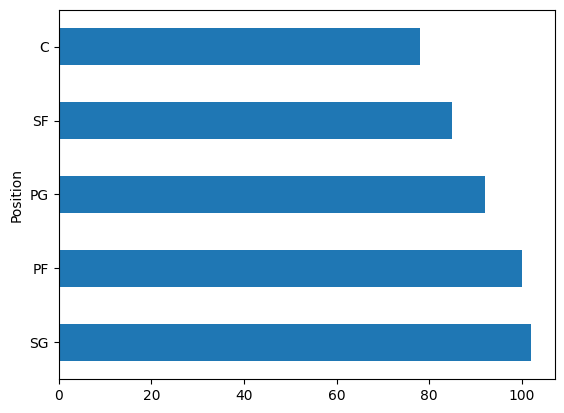

In [27]:
#Analysing the categorical columns - Position
df['Position'].value_counts().plot(kind='barh')

In [28]:
df['Position'].value_counts()

Position
SG    102
PF    100
PG     92
SF     85
C      78
Name: count, dtype: int64

**Inference of Position column :**
- Out of the 5 positions - there are more team members for 'SG' and 'PF' positions and the least number of team members for the 'C' position of the game collectively across all teams of the game.

C:\Users\Chandrakanth Y\AppData\Local\Temp\ipykernel_1256\2067729673.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], bins=10)


<Axes: xlabel='Age', ylabel='Density'>

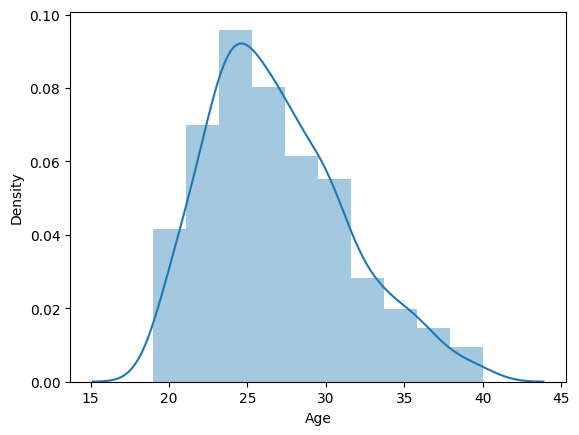

In [29]:
#Histogram for analysing Age column
sns.distplot(df['Age'], bins=10)

In [30]:
df['Age'].skew()

0.6263487611614392

**Inference of the Age Column**
- The skewness is positive indicating the graph is skewed towards the right
- This means that more players are less than the median height of the dataset.
- This is an indicator that there are more younger players across all teams between the age of 22.5 and 30.

C:\Users\Chandrakanth Y\AppData\Local\Temp\ipykernel_1256\747717760.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'],bins =7)


<Axes: xlabel='Height', ylabel='Density'>

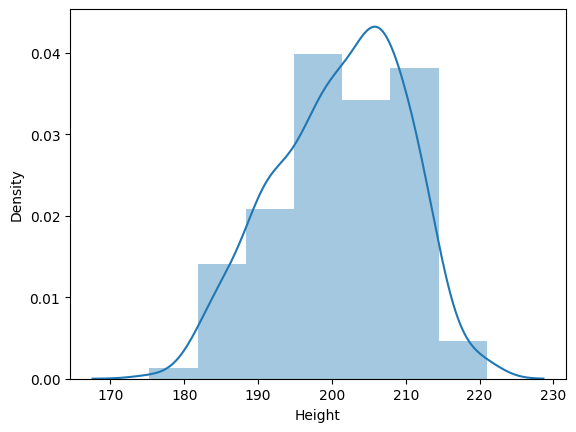

In [31]:
#Histogram for analysing Height column
sns.distplot(df['Height'],bins =7)

In [32]:
df['Height'].skew()

-0.2929451512019757

**Inference of Height Column**
- The skewness is negative indicating the graph is skewed towards the left.
- This means that more players are more than the median height of the dataset.

C:\Users\Chandrakanth Y\AppData\Local\Temp\ipykernel_1256\3911743251.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

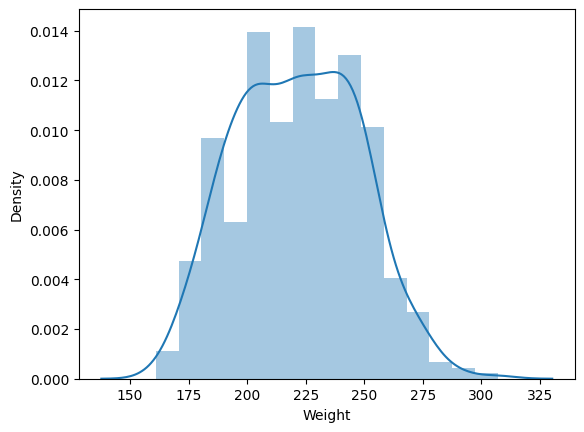

In [33]:
#Histogram for analysing Weight column
sns.distplot(df['Weight'])

In [34]:
df['Weight'].skew()

0.11378823248895656

**Inference of Weight Column**
- The skewness is near a zero value indicating the graph is evenly distributed and not skewed to any side.
- This means that the players weight ranges are evenly distributed.

C:\Users\Chandrakanth Y\AppData\Local\Temp\ipykernel_1256\1690667037.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Salary'],bins =7)


<Axes: xlabel='Salary', ylabel='Density'>

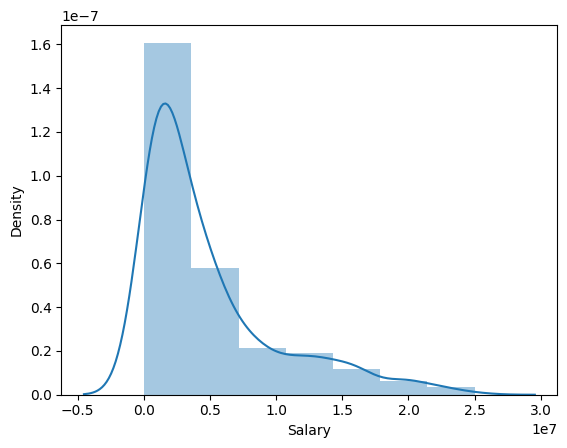

In [35]:
#Histogram for analysing Salary column
sns.distplot(df['Salary'],bins =7)

In [36]:
df['Salary'].skew()

1.5955114458621615

**Inference of Salary Column**
- The skewness is positive indicating the graph is skewed towards the right.
- This means that more players are getting less than the median salary of the dataset.

**Bivariate Analysis - Feature Relationships**

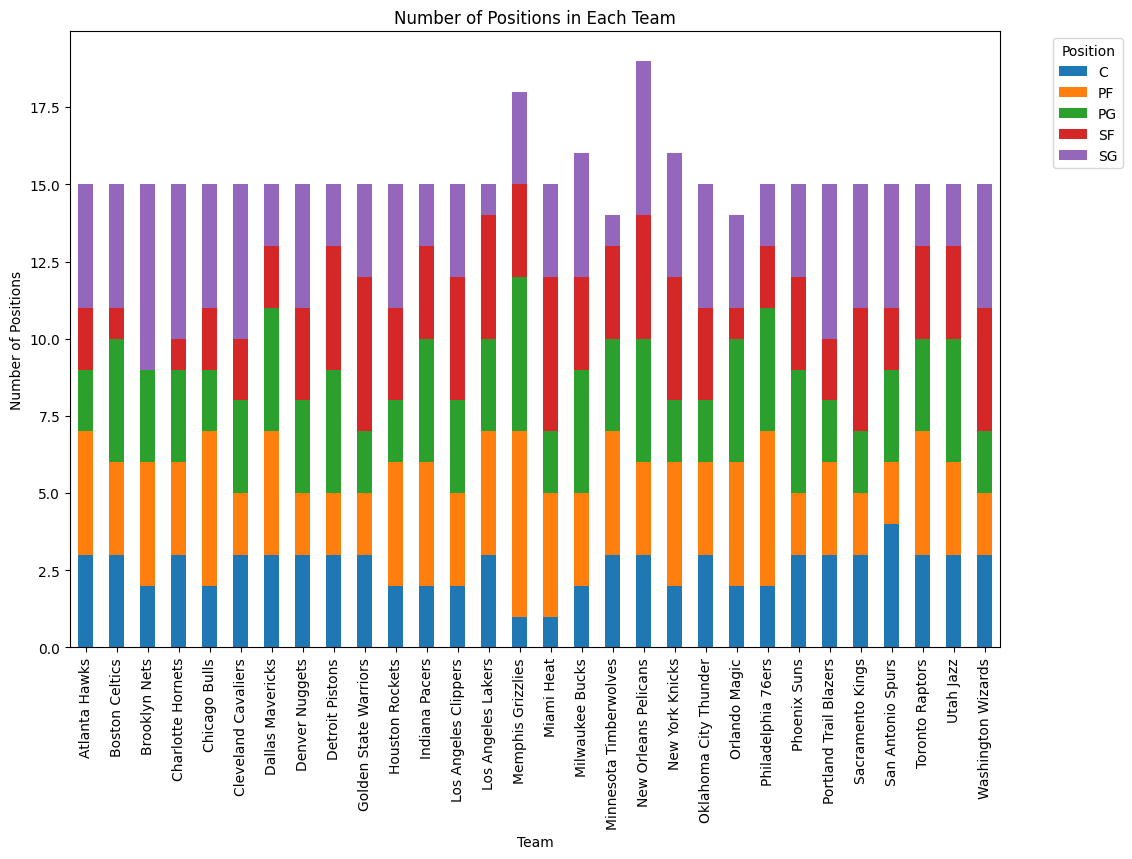

Position,C,PF,PG,SF,SG
Team,,,,,
Atlanta Hawks,3.0,4.0,2.0,2.0,4.0
Boston Celtics,3.0,3.0,4.0,1.0,4.0
Brooklyn Nets,2.0,4.0,3.0,NaN,6.0
Charlotte Hornets,3.0,3.0,3.0,1.0,5.0
Chicago Bulls,2.0,5.0,2.0,2.0,4.0
Cleveland Cavaliers,3.0,2.0,3.0,2.0,5.0
Dallas Mavericks,3.0,4.0,4.0,2.0,2.0
Denver Nuggets,3.0,2.0,3.0,3.0,4.0
Detroit Pistons,3.0,2.0,4.0,4.0,2.0


In [37]:
#Analysing the relationship between Team and Position
position_counts = df.groupby(['Team', 'Position']).size().unstack()
position_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Team')
plt.ylabel('Number of Positions')
plt.title('Number of Positions in Each Team')
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
position_counts

In [38]:
position_counts.idxmax(axis=0)

Position
C         San Antonio Spurs
PF        Memphis Grizzlies
PG        Memphis Grizzlies
SF    Golden State Warriors
SG            Brooklyn Nets
dtype: object

In [39]:
position_counts.idxmin(axis=0)

Position
C       Memphis Grizzlies
PF    Cleveland Cavaliers
PG          Atlanta Hawks
SF         Boston Celtics
SG     Los Angeles Lakers
dtype: object

**Inference of Team Vs Position**
- The above stacked bar chart depicts the count of team players in each position.

<Axes: xlabel='Salary', ylabel='Team'>

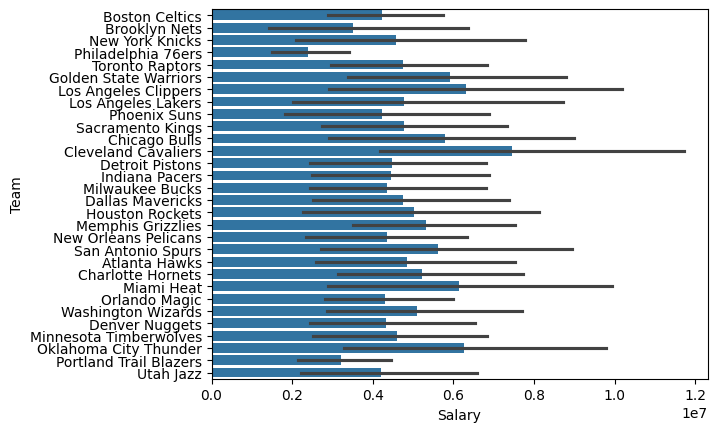

In [40]:
#Analysing the relationship between Team and Salary
sns.barplot(data = df,x= 'Salary', y='Team')

In [41]:
total_team_salary = df.groupby('Team')['Salary'].sum()
print(f'Team with Highest Collective Salary is "{total_team_salary.idxmax()}" with a collective salary of "{total_team_salary.max()}"')
print(f'Team with Lowest Collective Salary is "{total_team_salary.idxmin()}" with a collective salary of "{total_team_salary.min()}"')

Team with Highest Collective Salary is "Cleveland Cavaliers" with a collective salary of "111831373"
Team with Lowest Collective Salary is "Philadelphia 76ers" with a collective salary of "35835578"


In [42]:
team_mean_salary = df.groupby('Team')['Salary'].mean()
print(f'Team with Highest Average Salary is "{team_mean_salary.idxmax()}" with a average salary of "{team_mean_salary.max():.2f}"')
print(f'Team with Lowest Average Salary is "{team_mean_salary.idxmin()}" with a average salary of "{team_mean_salary.min():.2f}"')

Team with Highest Average Salary is "Cleveland Cavaliers" with a average salary of "7455424.87"
Team with Lowest Average Salary is "Philadelphia 76ers" with a average salary of "2389038.53"


<Axes: xlabel='Salary', ylabel='Position'>

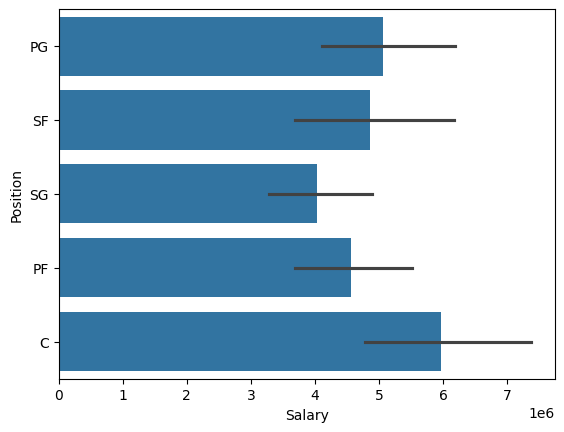

In [43]:
#Analysing the relationship between Position and Salary
sns.barplot(data = df,x= 'Salary', y='Position')

In [44]:
salary_per_position = df.groupby('Position')['Salary'].mean()
print(f'Collective Highest paid pposition is "{salary_per_position.idxmax()}" with a average salary of "{salary_per_position.max():.2f}"')
print(f'Collective Lowest paid position is "{salary_per_position.idxmin()}" with a average salary of "{salary_per_position.min():.2f}"')

Collective Highest paid pposition is "C" with a average salary of "5967052.00"
Collective Lowest paid position is "SG" with a average salary of "4034355.98"


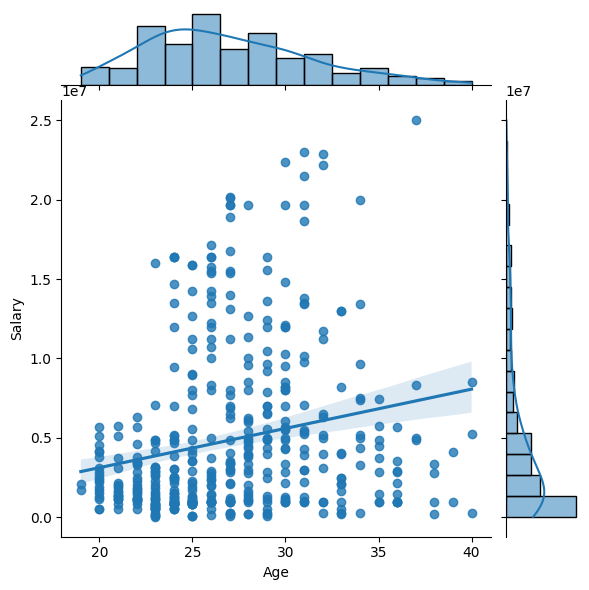

In [45]:
#Analysing the relationship between Age and Salary
sns.jointplot(data=df, x='Age', y='Salary', kind='reg')

**Inference on ScatterPlot of Age vs Salary :** 
- The plot depicts a non linear - positive - weak relationship between Age and Salary.
- However the trend line is increasing and it means that the team members with more age get paid more.

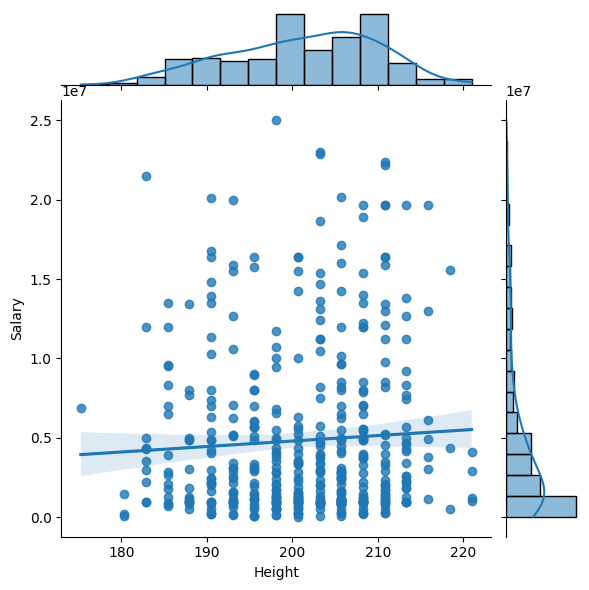

In [46]:
#Analysing the relationship between Height and Salary
sns.jointplot(data=df, x='Height', y='Salary', kind='reg')

**Inference on ScatterPlot of Height vs Salary :** 
- The plot depicts a non linear - positive - weak relationship between Height and Salary.
- The line shows that the 

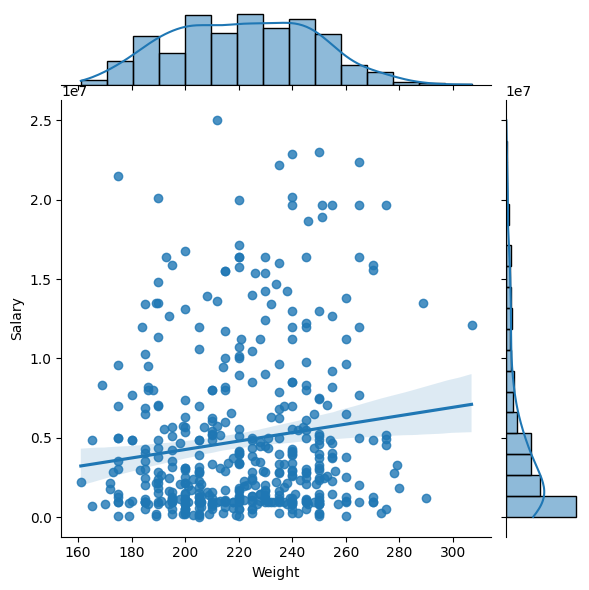

In [47]:
#Analysing the relationship between Weight and Salary
sns.jointplot(data = df, x = 'Weight', y = 'Salary',kind = 'reg')

**Inference on ScatterPlot of Weight vs Salary :** 
- The plot depicts a non linear - positive - weak relationship between Height and Salary.
- The line shows that the lesser the weight, more the salary as that region is more densely populated than the team mates with more weight.

**Correlation Analysis**

In [48]:
#Finding the correlation matrix for the numerical data present
correlation_matrix = df_numerical_data.corr()
correlation_matrix

,Age,Height,Weight,Salary
Age,1.000000,-0.005294,0.090123,0.245345
Height,-0.005294,1.000000,0.831310,0.027702
Weight,0.090123,0.831310,1.000000,0.054549
Salary,0.245345,0.027702,0.054549,1.000000


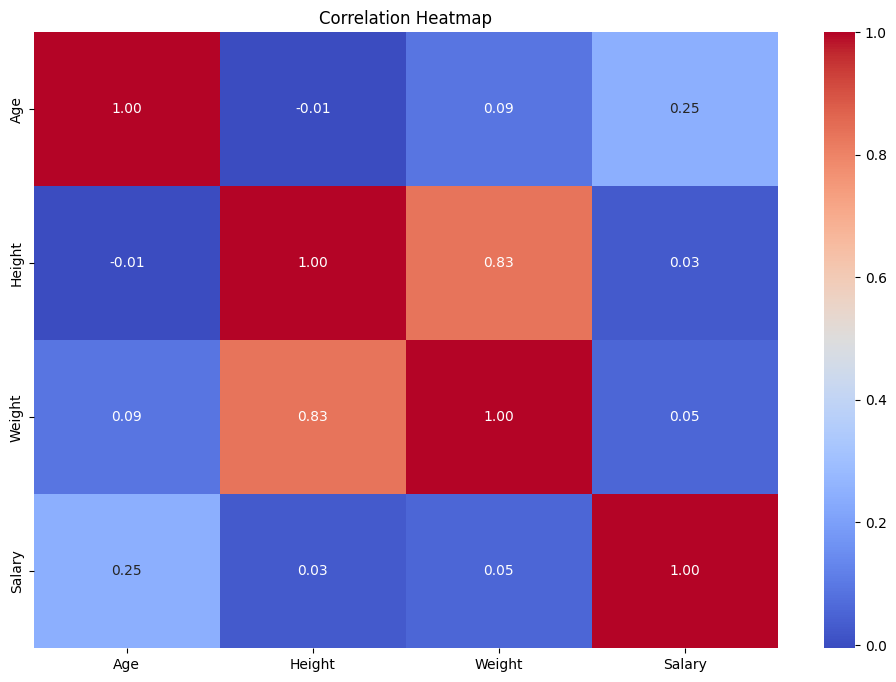

In [49]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm",  fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Inference of Correlation Plots :** From the correlation plot it is evident that age is more closely related to the prediction of the salary than height and weight

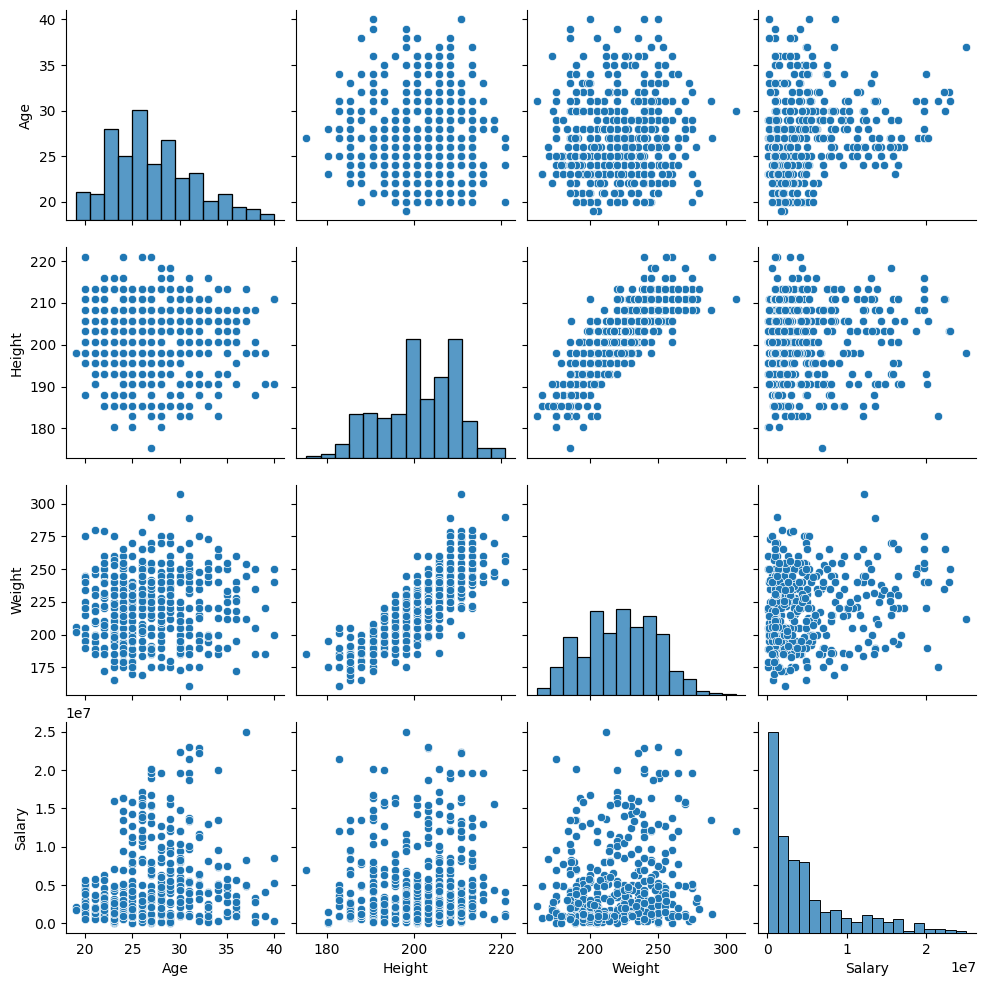

In [50]:
#Summarizing the numerical analysis [Both Univariate and Bivariate] with a pair plot
sns.pairplot(df)

**Inference on the pairplot**
The Feature relationships of the dataset are as follows:
- Age Vs Salary : Salary is comparatively more dependent than height or weight
- Height Vs Salary : Salary is weakly correlated with Height
- Weight Vs Salary : Salary is weakly correlated with Weight
- Height Vs Weight : The relationship is positive strong and linear and hence they are closely correlated
- Age Vs Weight : The relationship is positive weak and non linear and hence they are not closely correlated
- Age Vs Height : The relationship is positive weak and non linear and hence they are not closely correlated

**Multivariate Analysis**

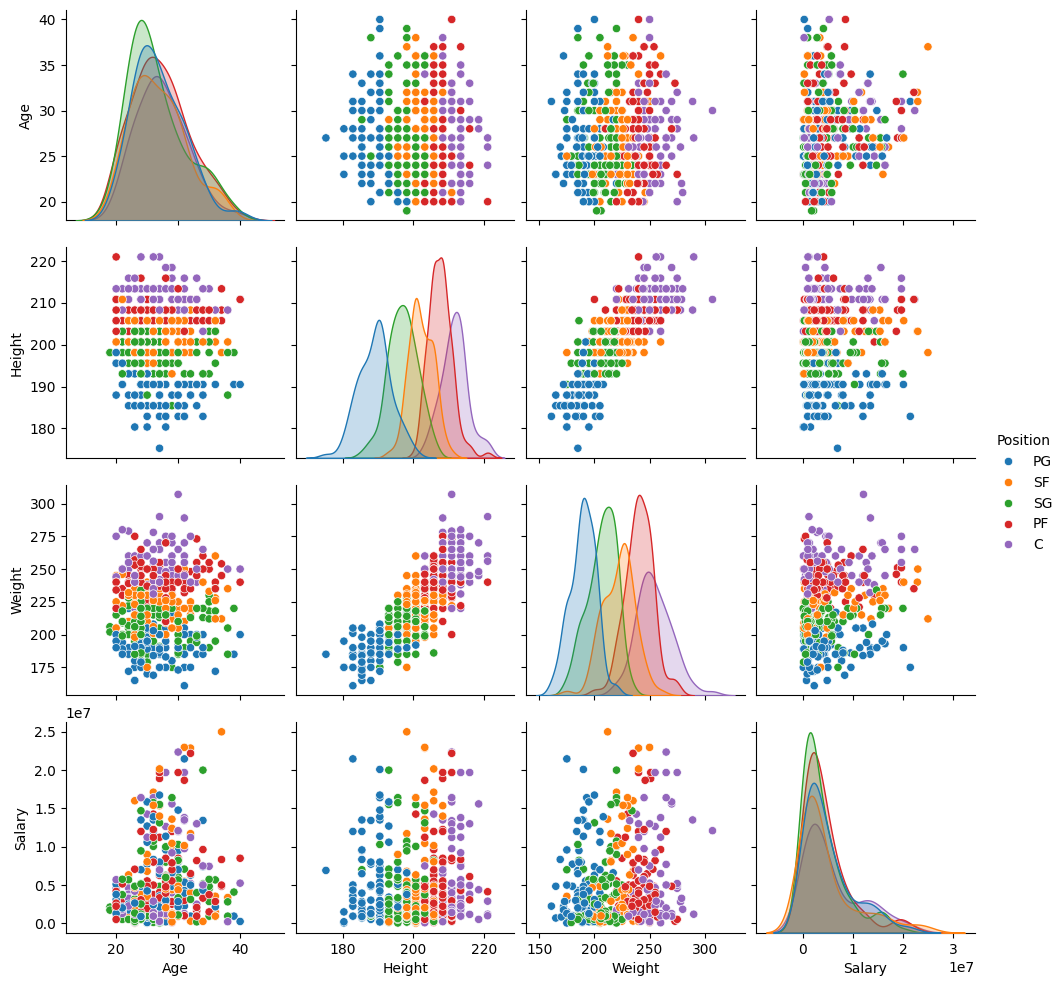

In [51]:
#Plotting the numerical columns by position
sns.pairplot(df, hue = 'Position')

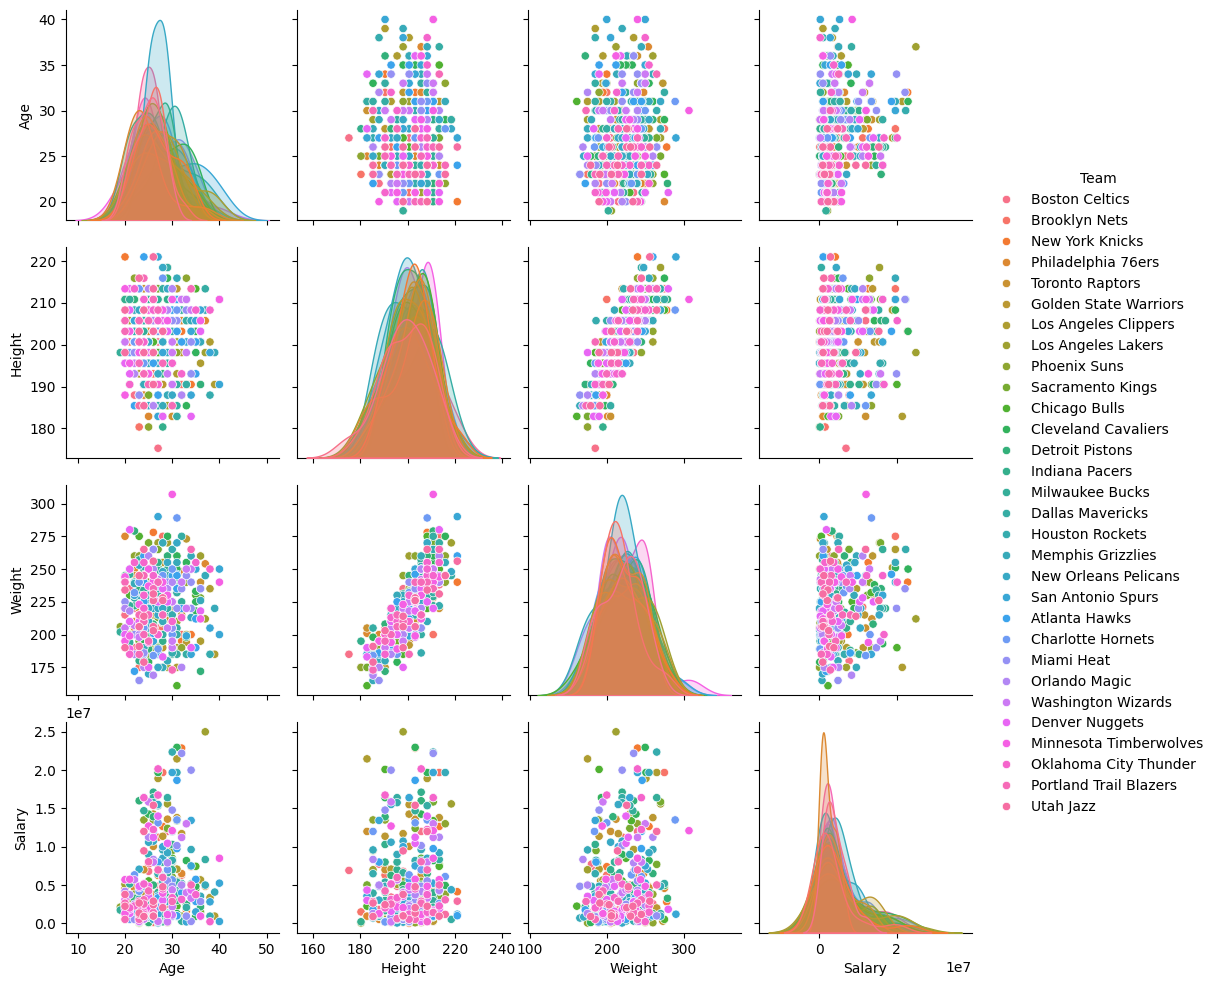

In [52]:
#Plotting the numerical columns by Team
sns.pairplot(df, hue = 'Team')

**Inference Of Multivariate Analysis**
- The pairplots above depicts the relationships between each numerical parameters and are filtered to show the variation in each position in the 1st chart and the variation in each team in the 2nd graph


**Conclusions derieved from the EDA**
From the dataset,
- The salary is more dependent on age than height and weight 
- The highest paid position is 'C' and the lowest paid position is 'SG' 
- On the other hand, there are number of positions for 'SG' are the highest and the number of  positions for 'C' are the lowest
- The team with Highest Collective Salary is "Cleveland Cavaliers" and the team with Lowest Collective Salary is "Philadelphia 76ers" but has the same number of players as "Cleveland Cavaliers"

References:
1. https://www.youtube.com/watch?v=xi0vhXFPegw
2. https://www.youtube.com/watch?v=-o3AxdVcUtQ
3. https://www.youtube.com/watch?v=rOHXb0WNA3c&t=1589s